<a href="https://colab.research.google.com/github/hariseldon99/msph402b/blob/main/Root_Finding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All Example Codes for Root Finding
===================================================

**Bisection Method**

#### The Problem

Find a solution to the equation
\begin{equation*}
2x^3 -2x + 7 = 0.
\end{equation*}

Given that there is a root in the bracket $[-2, -1]$

In [2]:
import numpy as np
from scipy.optimize import bisect

root, output = bisect(lambda x: 2*x**3 - 2*x +7, -2,-1, full_output=True)
print(f"Root of equation after {output.iterations} bisections = {root}")

Root of equation after 39 bisections = -1.7365250916172954


**Newton-Raphson Method**

#### The Problem
Use the Newton-Raphson Method to approximate the cube root of $37$. The equation we use is

\begin{equation*}
x^3 - 37 = 0.
\end{equation*}

Given that there is a root near $x_0=5$. Use both the bisection and the Newton Raphson method and compare their speeds.

In [3]:
from scipy.optimize import newton

x0 = 5

root, output = newton(lambda x: x**3 - 37, x0, fprime=lambda x: 3 * x**2, full_output=True)
print(f"Root of equation after {output.iterations} iterations = {root}")

Root of equation after 6 iterations = 3.3322218516459534


**Comparison of Bisection Method with Newton-Raphson Method**

* From file: [bisection_nr_comp.py](04-Root_Finding/bisection_nr_comp.py)

#### The Problem

Compare the results of the problem above with the same equation solved using the bisection method.


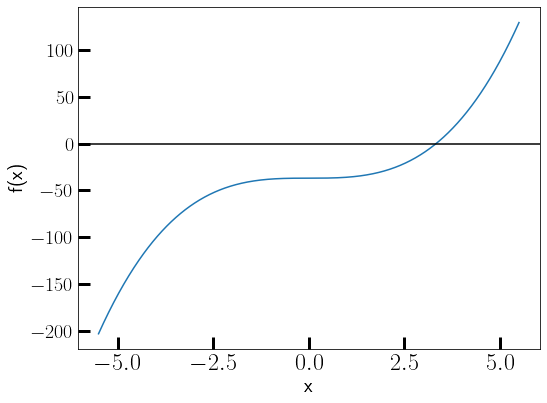

In [166]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20

x = np.linspace(-5.5, 5.5, 1000)
plt.plot(x, x**3 - 37)
plt.axhline(y=0, color='black')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [7]:
import numpy as np
from scipy.optimize import bisect, newton

def nr_recur(func, xn, fprime, itr=0, tol=1.48e-8, rtol=0.0, max_iter=1000):
    '''Our own implementation of the
        Newton Raphson Method by recursion'''

    xnp1 = xn - (func(xn)/fprime(xn))    
    itr += 1
    
    if itr >= max_iter:
        msg = (" Failed to converge after %d iterations,\
                    value is %s." % (itr, xnp1))
        raise RuntimeError(msg)
    elif np.isclose(xnp1, xn, rtol=rtol, atol=tol):
        return (xnp1, itr)
    else:
        args = func, xnp1, fprime
        kwargs = {'itr':itr, 'tol':tol, 'rtol':rtol, 'max_iter':max_iter}
        return nr_recur(*args, **kwargs)
    

x0, x1 = 2.0, 5.0

xtol=1e-8

print("Bisection:")
%timeit  bisect(lambda x: x**3 - 37, x0,x1, xtol=xtol, full_output=True)
root, output = bisect(lambda x: x**3 - 37, x0,x1, xtol=xtol, full_output=True)
print(f"Root of equation after {output.iterations} bisections = {root:1.9f}\n")

print("Newton-Raphson:")
%timeit newton(lambda x: x**3 - 37, x1, fprime=lambda x: 3 * x**2, tol=xtol, full_output=True)
root, output = newton(lambda x: x**3 - 37, x1, fprime=lambda x: 3 * x**2, tol=xtol, full_output=True)
print(f"Root of equation after {output.iterations} iterations = {root:1.9f}\n")

print("Newton-Raphson via recursion:")
%timeit nr_recur(lambda x: x**3 - 37, x1, lambda x: 3 * x**2, tol=xtol)
root, iters = nr_recur(lambda x: x**3 - 37, x1, lambda x: 3 * x**2, tol=xtol)
print(f"Root of equation after {iters} iterations = {root:1.9f}\n")

Bisection:
5.85 µs ± 152 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Root of equation after 29 bisections = 3.332221853

Newton-Raphson:
157 µs ± 1.76 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Root of equation after 6 iterations = 3.332221852

Newton-Raphson via recursion:
139 µs ± 770 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Root of equation after 6 iterations = 3.332221852



**Failure of Root-Finding Methods**

### The Problem

Use the bisection method to estimate a root of

\begin{equation*}
f(x) \equiv x^4-4x^3-6x^2-4x+1 = 0
\end{equation*}

Plot the function in order to figure out why bisection fails. Note that the LHS can be simplified to $f(x) = (x-1)^4$. Thus, a bracket with the point $x=1$ in it will always enclose the root.

Then, use the Newton-Raphson method to estimate a root of the function
\begin{equation*}
f(x) = \begin{cases}
        \sqrt{x} & x \geq 0\\
        -\sqrt{-x} & x < 0
        \end{cases}
\end{equation*}

Assume that the desired root is near $x=1$. Plot this function in order to figure out why the Newton-Raphson method fails.

In [8]:
import numpy as np
from scipy.optimize import bisect

func = np.polynomial.Polynomial([1, -4, 6, -4, 1])

root, output = bisect(func, 0.999, 1.001, full_output=True)
print(f"Root of equation after {output.iterations} bisections = {root:1.9f}\n")

ValueError: f(a) and f(b) must have different signs

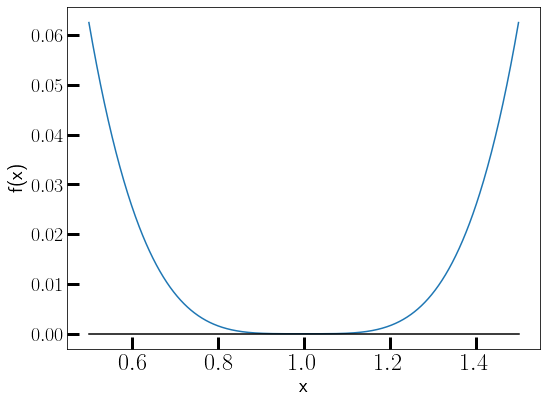

In [113]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20

func = np.polynomial.Polynomial([1, -4, 6, -4, 1])

x = np.linspace(0.5, 1.5, 1000)
plt.plot(x, func(x))
plt.plot(x, np.zeros_like(x),'black')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [9]:
from scipy.optimize import newton

x0 = 1

def func(x):
    return np.sqrt(x) if x >=0 else -np.sqrt(-x)

def deriv(x):
    return 1/(2*np.sqrt(x)) if x >=0 else 1/(2*np.sqrt(-x))

root, output = newton(func, x0, fprime=deriv, full_output=True)
print(f"Root of equation after {output.iterations} iterations = {root:1.9f}\n")

RuntimeError: Failed to converge after 50 iterations, value is 1.0.

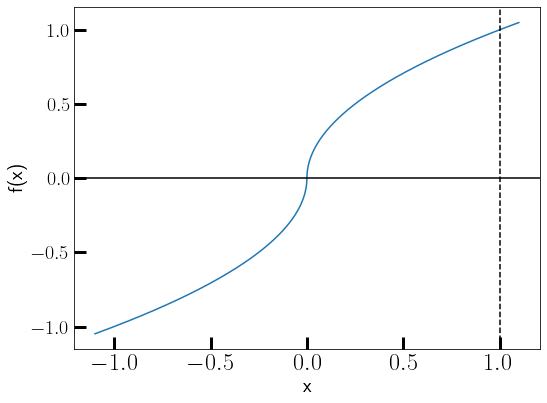

In [164]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20

x0, y0 = 1.0, func(1.0)

x = np.linspace(-1.1, 1.1, 1000)
y = [func(xi) for xi in x]
plt.plot(x, y)
plt.axvline(x=x0, ymax=y0, color="black", linestyle="--")
plt.axhline(y=0, color="black", linestyle="-")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

**Ridders' Method**

* From file: [ridders_bisection_nr_comp.py](04-Root_Finding/ridders_bisection_nr_comp.py)

### The Problem:

Find the roots of the function given below by Ridders' method and compare the solution, as well as the computational effort, with the Bisection and Newton-Raphson method. Assume that the root lies in the bracket $x\in[1.0, 1.25]$


\begin{equation*}
x = \frac{7}{5}\tanh{x}
\end{equation*}

In [10]:
import numpy as np
from scipy.optimize import bisect, newton, ridder

x0, x1 = 1.0, 1.25

def func(x):
    return x - (7/5) * np.tanh(x)

def deriv(x):
    return 1 - (7/5) * (1 - np.tanh(x)**2)

tol = 1e-8

print("Bisection:")
%timeit  bisect(func, x0, x1, xtol=tol ,full_output=True)
root, output = bisect(func, x0, x1, xtol=tol, full_output=True)
print(f"Root of equation after {output.iterations} bisections = {root:1.9f}\n")

print("Newton-Raphson:")
%timeit newton(func, x1, fprime=deriv, tol=tol, full_output=True)
root, output = newton(func, x1, fprime=deriv, full_output=True)
print(f"Root of equation after {output.iterations} iterations = {root:1.9f}\n")

print("Ridders':")
%timeit ridder(func, x0, x1, xtol=tol, full_output=True)
root, output = ridder(func, x0, x1, xtol=tol, full_output=True)
print(f"Root of equation after {output.iterations} iterations = {root:1.9f}\n")

Bisection:
21.9 µs ± 559 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Root of equation after 25 bisections = 1.140339948

Newton-Raphson:
132 µs ± 726 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Root of equation after 4 iterations = 1.140339944

Ridders':
9.01 µs ± 40.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Root of equation after 4 iterations = 1.140339939



### Problem: Ising model in the mean field

In your statistical mechanics courses, you have learned that the Ising model can be approximately solved in the mean field limit. If the magnetization per spin is given by $m$ at temperature $T$. Then, the mean field solution to magnetization can be obtained from the equation

\begin{equation*}
m = \tanh{\left(\alpha m\right)},
\end{equation*}

with $\alpha = zJ/k_BT$, and $z,J$ as the lattice co-ordination number and the 'hopping term' respectively. Now, probe this solution numerically by using Ridders' method to obtain roots for different values of $\alpha$, plotting the roots as a function of $\alpha$. Does the graph make sense physically?


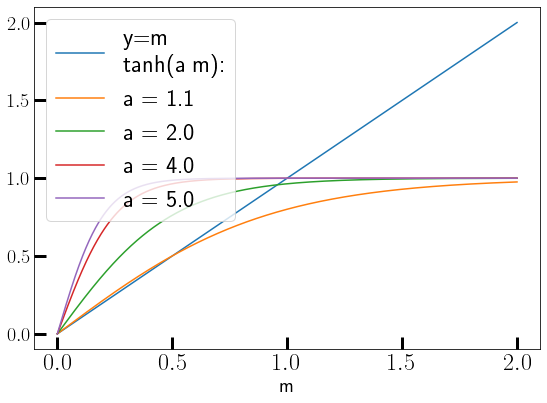

In [16]:
import numpy as np
from scipy.optimize import ridder
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20

m = np.linspace(0.0, 2.0, 1000)
alphas = [1.1, 2.0, 4.0, 5.0]

plt.xlabel('m')
plt.plot(m,m, label='y=m\n tanh(a m):')

for a in alphas:
    plt.plot(m,np.tanh(a * m), label=f'a = {a:1.1f}')

plt.legend()
plt.show()

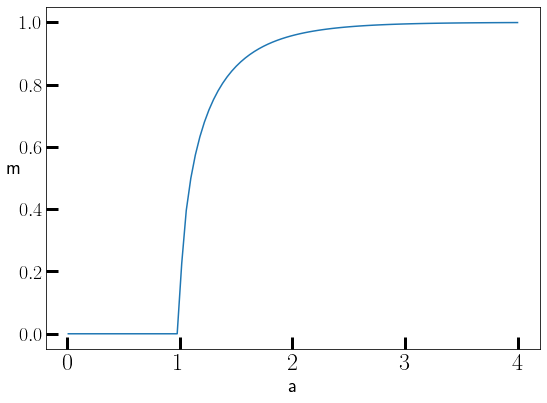

In [40]:
import numpy as np
from scipy.optimize import ridder
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20

#Experiment with this bracket by playing with the ranges of alphas in the plot above
m0, m1 = 0.1, 2.0

def func(x, a):
    return x - np.tanh(a * x)

tol = 1e-8

avals = np.linspace(0.01, 4.0, 100)
roots = []
for a in avals:
    # If the root finder fails with the first bracket, we'll use one which includes 0
    try:
        root = ridder(func, m0, m1, args=(a,), xtol=tol) 
    except ValueError:
        root = ridder(func, -0.1, 0.1, args=(a,), xtol=tol)
    roots.append(root)

plt.xlabel("a")
plt.ylabel("m", rotation=0)
plt.plot(avals, roots)
plt.show()

Now, add a constant field term $h$ to the system, the equation above gets modified to
\begin{equation*}
m = \tanh{\left(H + q m\right)},
\end{equation*}
where $H=\beta H$ and $q=zJ\beta$. Now, make plots of $m$ vs $q$ for a few values of $H$ and explain your results physically. Also, choose values of $q$ and plot $m$ vs $h$. Does this plot make sense? Display the phase diagram of the Ising model in $m-h$ space by plotting the results for $q=1$.

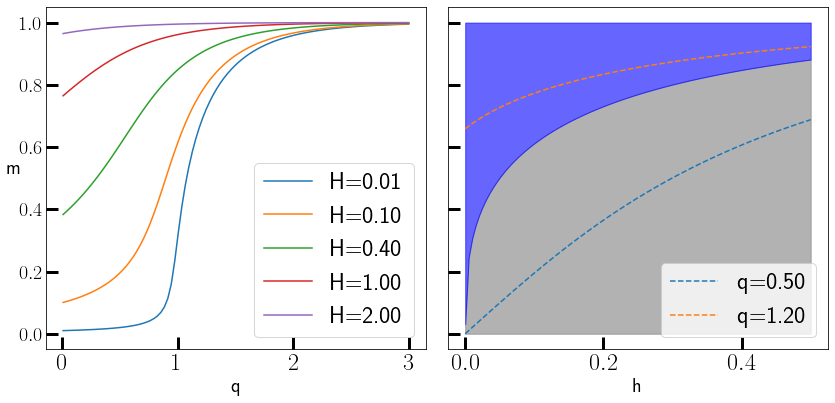

In [84]:
import numpy as np
from scipy.optimize import ridder
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 20

#Experiment with this bracket by playing with the ranges of alphas in the plot above
m0, m1 = 0.1, 2.0

def func(x, h, q):
    return x - np.tanh(h + q * x)

tol = 1e-8

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)

def return_root(*args):
    # If the root finder fails with the first bracket, we'll use one which includes 0
    try:
        root = ridder(func, m0, m1, args=args, xtol=tol) 
    except ValueError:
        root = ridder(func, -0.1, 0.1, args=args, xtol=tol)
    return root


hvals = [0.01, 0.1, 0.4, 1.0, 2.0]
qvals = np.linspace(0.01, 3.0, 100)
for h in hvals:
    roots = [return_root(h,q) for q in qvals]
    ax1.plot(qvals, roots, label=f'H={h:1.2f}')

ax1.set_xlabel("q")
ax1.set_ylabel("m", rotation=0)
ax1.legend()


qvals = [0.5, 1.2]
hvals = np.linspace(1e-5, 0.5, 100)
for q in qvals:
    roots = [return_root(h,q) for h in hvals]
    ax2.plot(hvals, roots,ls = '--', label=f'q={q:1.2f}')

ax2.set_xlabel("h")
ax2.legend()

# Shade the ferromagnetic phase region in gray, para in blue
q = 1.0
roots = [return_root(h,q) for h in hvals]
ax2.fill_between(hvals,roots, color='gray', alpha=0.6)
ax2.fill_between(hvals, roots, 1, color='blue', alpha=0.6)

plt.show()